# Plant Disease Prediction

## Importing Dataset

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Importing libraries

In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

 Preprocessing

 Training

In [20]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train1',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 7771 files belonging to 4 classes.


 Validation Image

In [21]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid1',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1943 files belonging to 4 classes.


## Building Model

In [22]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [23]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [24]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [25]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [26]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [27]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [28]:
cnn.add(tf.keras.layers.Flatten())

In [29]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [30]:
cnn.add(tf.keras.layers.Dropout(0.4)) 

In [31]:

cnn.add(tf.keras.layers.Dense(units=4,activation='softmax'))

In [32]:
cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1500)           │    13,825,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │         6,004 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,003,760 (57.23 MB)

 Trainable params: 15,003,760 (57.23 MB)

 Non-trainable params: 0 (0.00 B)

### Compiling and Training Phase

In [33]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [34]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 252s 1s/step - accuracy: 0.6398 - loss: 1.1830 - val_accuracy: 0.9182 - val_loss: 0.2513
Epoch 2/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 232s 954ms/step - accuracy: 0.9116 - loss: 0.2502 - val_accuracy: 0.9403 - val_loss: 0.1614
Epoch 3/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 241s 991ms/step - accuracy: 0.9427 - loss: 0.1586 - val_accuracy: 0.9635 - val_loss: 0.0827
Epoch 4/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 234s 961ms/step - accuracy: 0.9670 - loss: 0.0959 - val_accuracy: 0.9521 - val_loss: 0.1273
Epoch 5/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 230s 945ms/step - accuracy: 0.9705 - loss: 0.0834 - val_accuracy: 0.9799 - val_loss: 0.0554
Epoch 6/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 223s 916ms/step - accuracy: 0.9835 - loss: 0.0458 - val_accuracy: 0.9830 - val_loss: 0.0482
Epoch 7/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 223s 918ms/step - accuracy: 0.9750 - loss: 0.0748 - val_accuracy: 0.9665 - val_loss: 0.0993
Epoch 8/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 226s 928ms/step - accuracy: 0.9890 - lo

## Evaluating Model

In [35]:

train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

243/243 ━━━━━━━━━━━━━━━━━━━━ 41s 170ms/step - accuracy: 0.9916 - loss: 0.0275
Training accuracy: 0.99176424741745


In [36]:

val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

61/61 ━━━━━━━━━━━━━━━━━━━━ 10s 170ms/step - accuracy: 0.9740 - loss: 0.0735
Validation accuracy: 0.9737519025802612


### Saving Model

In [37]:
cnn.save('trained_plant_disease_model_apple.keras')

In [38]:

import json
with open('training_hist_apple.json','w') as f:
  json.dump(training_history.history,f)

In [39]:
training_history.history

{'accuracy': [0.7614206671714783,
  0.9199588298797607,
  0.9467250108718872,
  0.9652554392814636,
  0.9718183279037476,
  0.98365718126297,
  0.9806974530220032,
  0.9886758327484131,
  0.9849440455436707,
  0.9899626970291138],
 'loss': [0.6640585064888,
  0.22792398929595947,
  0.14676178991794586,
  0.09906205534934998,
  0.08251531422138214,
  0.043777383863925934,
  0.057377565652132034,
  0.032263342291116714,
  0.04343964532017708,
  0.029954101890325546],
 'val_accuracy': [0.918167769908905,
  0.9402984976768494,
  0.9634585976600647,
  0.9521358609199524,
  0.9799279570579529,
  0.9830159544944763,
  0.9665465950965881,
  0.9809572696685791,
  0.9634585976600647,
  0.9737519025802612],
 'val_loss': [0.25128233432769775,
  0.16137947142124176,
  0.08266007900238037,
  0.1272907704114914,
  0.055421583354473114,
  0.04822366312146187,
  0.09929309040307999,
  0.05288385599851608,
  0.10578092932701111,
  0.07342814654111862]}

In [40]:
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


 Accuracy Visualization

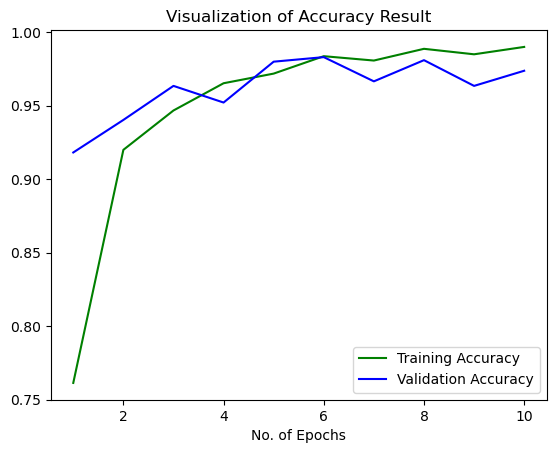

In [43]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='green',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

other metrics for model evaluation

In [44]:
class_name = validation_set.class_names

In [46]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid1',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1943 files belonging to 4 classes.


In [47]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

1943/1943 ━━━━━━━━━━━━━━━━━━━━ 36s 19ms/step


In [48]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)


In [49]:
Y_true

<tf.Tensor: shape=(1943,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3], dtype=int64)>

In [50]:
predicted_categories

<tf.Tensor: shape=(1943,), dtype=int64, numpy=array([0, 0, 0, ..., 3, 3, 3], dtype=int64)>

In [51]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [52]:

print(classification_report(Y_true,predicted_categories,target_names=class_name))

                          precision    recall  f1-score   support

      Apple___Apple_scab       0.99      0.92      0.95       504
       Apple___Black_rot       0.93      1.00      0.96       497
Apple___Cedar_apple_rust       0.99      1.00      0.99       440
         Apple___healthy       0.99      0.98      0.99       502

                accuracy                           0.97      1943
               macro avg       0.98      0.97      0.97      1943
            weighted avg       0.98      0.97      0.97      1943



### Confusion Matrix Visualization

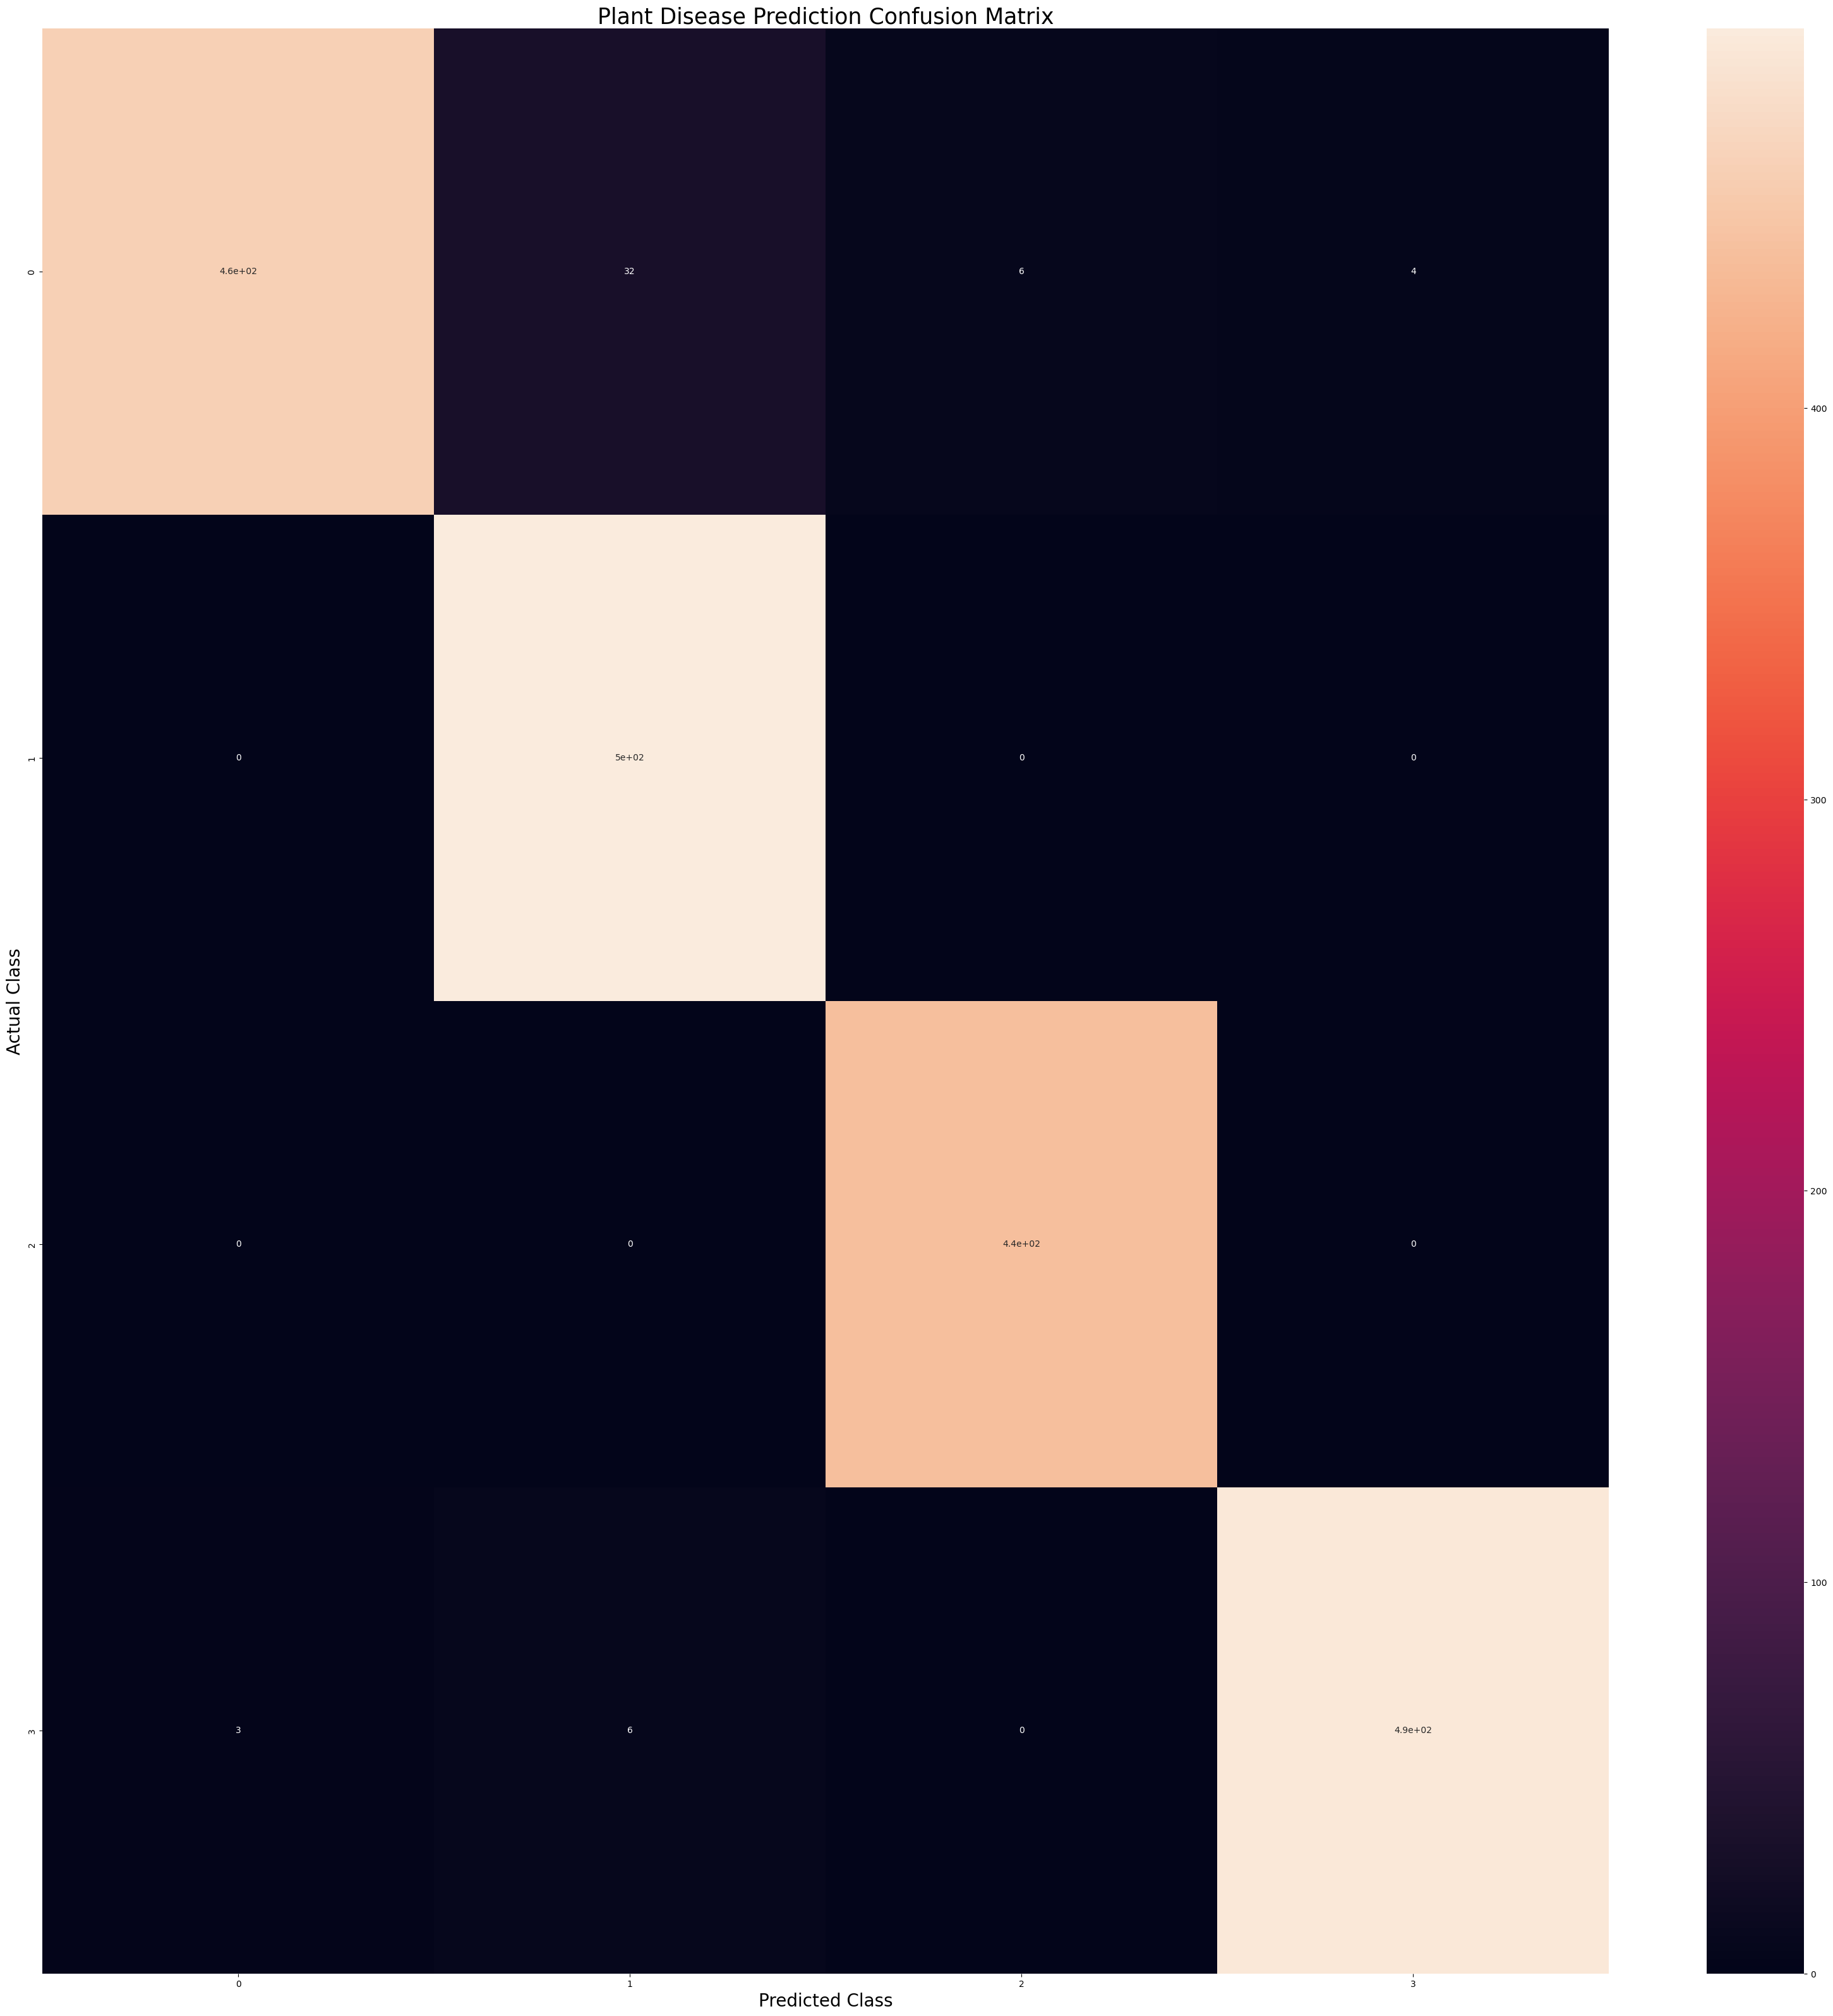

In [53]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()